# Task 1 - Sketch Only

In [1]:
import pandas as pd

default = pd.read_csv('default.csv')

default.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [2]:
# Only 333 people defaulted
# Very imbalanced dataset
# This means that the model, if not trained carefully, could just predict everyone is 0
# In this scenario, we care about FN more
default['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [5]:
# Make sure we have converted categorical variables to dummy variables
default = pd.get_dummies(default, drop_first=True)
default.head()

,default,balance,income,student_Yes
0,0,729.526495,44361.62507,0
1,0,817.180407,12106.13470,1
2,0,1073.549164,31767.13895,0
3,0,529.250605,35704.49394,0
4,0,785.655883,38463.49588,0


In [6]:
# EDA: Instead of correlation, let's do groupby
# Analyse the people who defaulted and didn't default separately and see their difference
default.groupby('default').mean()

,balance,income,student_Yes
default,,,
0,803.94375,33566.166625,0.291404
1,1747.82169,32089.147124,0.381381


In [13]:
# EDA: Instead of correlation, let's do groupby
# Analyse the people who defaulted and didn't default separately and see their difference
# Find the ratio between people who defaulted to people who didn't default
default.groupby('default').mean().iloc[0, :] / default.groupby('default').mean().iloc[1, :]

balance        0.459969
income         1.046029
student_Yes    0.764074
dtype: float64

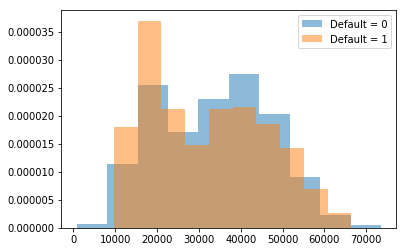

In [24]:
import matplotlib.pyplot as plt
plt.hist(default[default['default'] == 0]['income'], density=True, alpha=0.5, label='Default = 0')
plt.hist(default[default['default'] == 1]['income'], density=True, alpha=0.5, label='Default = 1')
plt.legend()
plt.show()

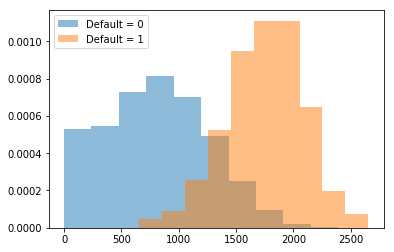

In [25]:
import matplotlib.pyplot as plt
plt.hist(default[default['default'] == 0]['balance'], density=True, alpha=0.5, label='Default = 0')
plt.hist(default[default['default'] == 1]['balance'], density=True, alpha=0.5, label='Default = 1')
plt.legend()
plt.show()